In [2]:
# set up $PATH - we need to fix this on bacon. 
import pandas as pd
import numpy as np
import os
os.environ['PATH'] = '/home/gregcaporaso/.conda/envs/qiime/bin:/home/gregcaporaso/bin:/home/gregcaporaso/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games'

In [17]:
raw_seqs_fps = {0: '/home/gregcaporaso/2015-nacp-raw-data/run0/slout_R1/seqs.fna',
                1: '/home/gregcaporaso/2015-nacp-raw-data/run1/slout_R1/seqs.fna',
                2: '/home/gregcaporaso/2015-nacp-raw-data/run2/slout_R1/seqs.fna',
                3: '/home/gregcaporaso/2015-nacp-raw-data/run3/slout_R1/seqs.fna'}
combined_seqs_fp = '/home/gregcaporaso/2015-nacp-raw-data/combined-seqs.fna'
raw_seqs_fps_str = ' '.join(raw_seqs_fps.values())
!cat $raw_seqs_fps_str > $combined_seqs_fp

In [12]:
all_seqs_fps_str = ','.join(raw_seqs_fps.values() + [combined_seqs_fp])
!count_seqs.py -i $all_seqs_fps_str


5833036  : /home/gregcaporaso/2015-nacp-raw-data/run1/slout_R1/seqs.fna (Sequence lengths (mean +/- std): 151.0000 +/- 0.0000)
6216515  : /home/gregcaporaso/2015-nacp-raw-data/run2/slout_R1/seqs.fna (Sequence lengths (mean +/- std): 151.0000 +/- 0.0000)
6980341  : /home/gregcaporaso/2015-nacp-raw-data/run3/slout_R1/seqs.fna (Sequence lengths (mean +/- std): 151.0000 +/- 0.0000)
13792300  : /home/gregcaporaso/2015-nacp-raw-data/run0/slout_R1/seqs.fna (Sequence lengths (mean +/- std): 151.0000 +/- 0.0000)
32822192  : /home/gregcaporaso/2015-nacp-raw-data/combined-seqs.fna (Sequence lengths (mean +/- std): 151.0000 +/- 0.0000)
65644384  : Total


In [18]:
rep_set_fp = os.path.join('combined-rep-set.fna')
uc_fp = os.path.join('combined-derep.uc')
biom_fp = os.path.join('combined-derep.biom')
!vsearch --derep_fulllength $combined_seqs_fp --output $rep_set_fp --uc $uc_fp --relabel_sha1 --relabel_keep
!biom from-uc -i $uc_fp -o $biom_fp --rep-set-fp $rep_set_fp

vsearch v1.7.0_linux_x86_64, 283.4GB RAM, 32 cores
https://github.com/torognes/vsearch

Reading file /home/gregcaporaso/2015-nacp-raw-data/combined-seqs.fna 100%
4956150992 nt in 32822192 seqs, min 151, max 151, avg 151
Dereplicating 100%
Sorting 100%
3936860 unique sequences, avg cluster 8.3, median 1, max 847160
Writing output file 100%
Writing uc file, first part 100%
Writing uc file, second part 100%


In [19]:
!biom summarize-table -i $biom_fp

Num samples: 986
Num observations: 3936860
Total count: 32822192
Table density (fraction of non-zero values): 0.002

Counts/sample summary:
 Min: 1.0
 Max: 316900.0
 Median: 20563.000
 Mean: 33288.227
 Std. dev.: 37024.540
 Sample Metadata Categories: None provided
 Observation Metadata Categories: None provided

Counts/sample detail:
udca.trial.2HWCMBKU9QMSE: 1.0
udca.trial.5ARJW7J90HIX4: 1.0
udca.trial.57VOZHTSP5XEE: 1.0
udca.trial.46CKFM6MTT2XN: 1.0
udca.trial.67HWOV7G52RWJ: 1.0
udca.trial.3A8E0TVU1XCSS: 1.0
udca.trial.G2IPDHZNMYO: 1.0
udca.trial.4R42WF9QJC5NG: 1.0
udca.trial.1FX7H8EN3TWJL: 1.0
udca.trial.5QCMCTI2GCPAC: 1.0
udca.trial.74MYRQPORAQFW: 1.0
udca.trial.7F0UGPVDNP3BM: 1.0
udca.trial.4PUS7DOK8J1AI: 1.0
udca.trial.5TOQRVYU5HTMR: 1.0
udca.trial.2MKIT0MPUJEGZ: 1.0
udca.trial.4YOLU4HMLZSY1: 1.0
udca.trial.O96YJE79H07A: 2.0
udca.trial.60FQOLWB4MLAT: 2.0
udca.trial.54JKKFD100T1Z: 2.0
udca.trial.7NZXBHG13L9VY: 2.0
udca.trial.1UZMKEB5SGVFN: 2.0
udca.trial.2ISDSQMWUUECI: 2.0
udca.t

In [20]:
# clean up the combined sequences files since it's big and easy to recreate
!rm -r $combined_seqs_fp

In [2]:
!wc -l $PWD/rdp-assigned-tax/combined-rep-set_tax_assignments.txt

3936860 /home/gregcaporaso/2015-nacp-raw-data/rdp-assigned-tax/combined-rep-set_tax_assignments.txt


In [ ]:
!parallel_assign_taxonomy_rdp.py -i /home/gregcaporaso/gg_13_8_otus/rep_set/99_otus.fasta 

```
ssu-align combined-rep-set.fna combined-ssu-align/
ssu-mask -a combined-ssu-align.bacteria.stk
ssu-mask -a --stk2afa combined-ssu-align.bacteria.mask.stk
FastTree -nosupport -fastest -nt combined-ssu-align.bacteria.mask.afa > combined-ssu-align.bacteria.mask.tre
export OMP_NUM_THREADS=29; FastTreeMP -nosupport -fastest -nt combined-ssu-align.bacteria.mask.afa > combined-ssu-align.bacteria.mask.ftmptre

parallel_assign_taxonomy_rdp.py -r /home/gregcaporaso/gg_13_8_otus/rep_set/99_otus.fasta -t /home/gregcaporaso/gg_13_8_otus/taxonomy/99_otu_taxonomy.txt -i /home/gregcaporaso/2015-nacp-raw-data/combined-rep-set.fna -o /home/gregcaporaso/2015-nacp-raw-data/rdp-assigned-tax-99/ -O 28
biom add-metadata -i $PWD/combined-derep.biom -o $PWD/combined-derep.rdp-tax-99.biom --observation-metadata-fp $PWD/rdp-assigned-tax-99/combined-rep-set_tax_assignments.txt --observation-header ID,taxonomy --sc-separated taxonomy

# filter OTUs in less than two samples , now only 505,989 OTUs (opposed to >3m)
filter_otus_from_otu_table.py -i combined-derep.rdp-tax-99.biom -o combined-derep.rdp-tax-99.ms2.biom -s 2
core_diversity_analyses.py -i $PWD/combined-derep.rdp-tax-99.ms2.biom -o $PWD/cd_even5401 -t combined-ssu-align/combined-ssu-align.bacteria.mask.ftmptre -aO 29 -e 5401 -m $PWD/master-map.tsv

# full OTU table
core_diversity_analyses.py -i $PWD/combined-derep.rdp-tax-99.biom -o $PWD/cd_ms2_even5000 -t combined-ssu-align/combined-ssu-align.bacteria.mask.ftmptre -aO 10 -e 5000 -m $PWD/master-map.tsv

core_diversity_analyses.py -i $PWD/combined-derep.rdp-tax-99.biom -o $PWD/cd_ms2_even10000 -t combined-ssu-align/combined-ssu-align.bacteria.mask.ftmptre -aO 10 -e 10000 -m $PWD/master-map.tsv

# old... 
assign_taxonomy.py -i /home/gregcaporaso/2015-nacp-raw-data/combined-rep-set.fna -o $PWD/rdp-assigned-tax/ -m rdp
biom add-metadata -i $PWD/combined-derep.biom -o $PWD/combined-derep.rdp-tax.biom --observation-metadata-fp $PWD/rdp-assigned-tax/combined-rep-set_tax_assignments.txt --observation-header ID,taxonomy --sc-separated taxonomy




```

For fun, let's compare the number and number of types of species-level assignments 

In [1]:
!grep -c s__ $PWD/rdp-assigned-tax-99/combined-rep-set_tax_assignments.txt

2545694


In [2]:
!grep -c s__ $PWD/rdp-assigned-tax/combined-rep-set_tax_assignments.txt

2606405


In [8]:
a99 = !cut -f 2 $PWD/rdp-assigned-tax-99/combined-rep-set_tax_assignments.txt
a99 = set(a99)
len(a99)

1961

In [9]:
a97 = !cut -f 2 $PWD/rdp-assigned-tax/combined-rep-set_tax_assignments.txt
a97 = set(a97)
len(a97)

1765

In [11]:
for e in a99:
    print(e)

k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__NB1-j;f__NB1-i;g__;s__
k__Bacteria;p__Gemmatimonadetes
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__mendocina
k__Bacteria;p__Verrucomicrobia;c__[Pedosphaerae];o__[Pedosphaerales];f__Ellin517;g__;s__
k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Tremblayales;f__Tremblayaceae;g__Zinderia;s__insecticola
k__Bacteria;p__Planctomycetes;c__C6;o__MVS-107;f__;g__;s__
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium;s__longum
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Pseudonocardiaceae;g__Actinomycetospora;s__
k__Bacteria;p__Bacteroidetes;c__[Saprospirae];o__[Saprospirales];f__Chitinophagaceae;g__Flavihumibacter;s__
k__Bacteria;p__Verrucomicrobia;c__[Pedosphaerae];o__[Pedosphaerales];f__R4-41B;g__;s__
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Alicyclobacillaceae;g__Ali

In [12]:
for e in a97:
    print(e)

k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__NB1-j;f__NB1-i;g__;s__
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methylobacteriaceae;g__Methylobacterium
k__Bacteria;p__Gemmatimonadetes
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__mendocina
k__Bacteria;p__Verrucomicrobia;c__[Pedosphaerae];o__[Pedosphaerales];f__Ellin517;g__;s__
k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Tremblayales;f__Tremblayaceae;g__Zinderia;s__insecticola
k__Bacteria;p__Planctomycetes;c__C6;o__MVS-107;f__;g__;s__
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium;s__longum
k__Bacteria;p__Tenericutes;c__Mollicutes;o__Entomoplasmatales;f__Entomoplasmataceae;g__Mesoplasma
k__Bacteria;p__Bacteroidetes;c__[Saprospirae];o__[Saprospirales];f__Chitinophagaceae;g__Flavihumibacter;s__
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Vir

In [4]:
map99 = {e.split('\t')[0]: e.split('\t')[1] for e in open('rdp-assigned-tax-99/combined-rep-set_tax_assignments.txt')}

In [5]:
map97 = {e.split('\t')[0]: e.split('\t')[1] for e in open('rdp-assigned-tax/combined-rep-set_tax_assignments.txt')}

In [14]:
otu_ids = []
data = []
for k, v99 in map99.items():
    v97 = map97[k]
    if v99 != v97:
        otu_ids.append(k)
        data.append([v97, len(v97.split(';')), v99, len(v99.split(';'))])
diffs = pd.DataFrame(data,
                     columns=['Assign vs 97', 'Levels 97', 'Assign vs 99', 'Levels 99'],
                     index=otu_ids)

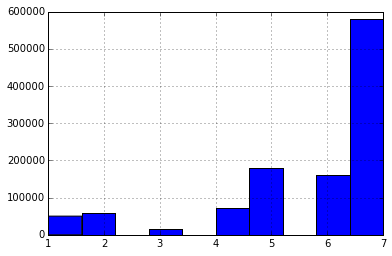

In [17]:
%matplotlib inline
diffs['Levels 97'].hist()

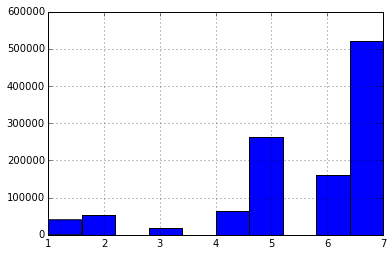

In [18]:
%matplotlib inline
diffs['Levels 99'].hist()

Usage: core_diversity_analyses.py [options] {-i/--input_biom_fp INPUT_BIOM_FP -o/--output_dir OUTPUT_DIR -m/--mapping_fp MAPPING_FP -e/--sampling_depth SAMPLING_DEPTH}

[] indicates optional input (order unimportant)
{} indicates required input (order unimportant)

This script plugs several QIIME diversity analyses together to form a basic workflow beginning with a BIOM table, mapping file, and optional phylogenetic tree.

The included scripts are those run by the workflow scripts alpha_rarefaction.py, beta_diversity_through_plots.py, summarize_taxa_through_plots.py, plus the (non-workflow) scripts make_distance_boxplots.py, compare_alpha_diversity.py, and group_significance.py. To update parameters to the workflow scripts, you should pass the same parameters file that you would pass if calling the workflow script directly.

Additionally, a table summary is generated by running the 'biom summarize-table' command (part of the biom-format package). To update parameters to this command, y

In [22]:
!ls


0				combined-derep.uc     or-otus-derep.tgz
1				combined-map.txt      rdp-assigned-tax
2				combined-rep-set.fna  rdp-assigned-tax-99
2015.10-vsearch-derep.ipynb	combined-ssu-align    run0
3				derep-params.txt      run1
combined-derep.biom		master-map.tsv	      run2
combined-derep.rdp-tax-99.biom	or-otus		      run3
combined-derep.rdp-tax.biom	or-otus-derep
